# Diagnóstico
- Standardized residuals:
    Residuos divididos por el error estándar de los residuos.
- Outliers:
    Registros (o valores de resultado) que están distantes del resto de los datos (o del resultado previsto).
- Influential value
    Un valor o registro cuya presencia o ausencia hace una gran diferencia en la ecuación de regresión.
- Leverage
    El grado de influencia que tiene un solo registro en una ecuación de regresión.
- Non-normal residuals
    Los residuos que no se distribuyen normalmente pueden invalidar algunos requisitos técnicos de la regresión, pero generalmente no son una preocupación en la ciencia de datos.
- Heteroskedasticity
    Cuando algunos rangos del resultado experimentan residuos con mayor varianza (puede indicar que falta un predictor en la ecuación).
- Partial residual plots
    Un diagrama de diagnóstico para iluminar la relación entre la variable de resultado y un predictor único.

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("../Datasets/cleaned_data.csv")
data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [12]:
data

,SalePrice,zhvi_px,zhvi_idx,NbrLivingUnits,SqFtLot,SqFtTotLiving,SqFtFinBasement,Bathrooms,Bedrooms,BldgGrade,...,YrRenovated,TrafficNoise,LandVal,ImpsVal,NewConstruction,PropertyType_Multiplex,PropertyType_Single Family,PropertyType_Townhouse,ZipGroup,AdjSalePrice
0,280000,405100,0.930836,2,9373,2400,0,3.00,6,7,...,0,0,70000,229000,0,1,0,0,1,300805.0
1,1000000,404400,0.929228,1,20156,3764,1452,3.75,4,10,...,0,0,203000,590000,1,0,1,0,1,1076162.0
2,745000,425600,0.977941,1,26036,2060,900,1.75,4,8,...,0,0,183000,275000,0,0,1,0,1,761805.0
3,425000,418400,0.961397,1,8618,3200,1640,3.75,5,7,...,0,0,104000,229000,0,0,1,0,1,442065.0
4,240000,351600,0.807904,1,8620,1720,0,1.75,4,7,...,0,0,104000,205000,0,0,1,0,1,297065.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22682,325000,318700,0.732307,1,5468,1480,590,1.75,3,7,...,0,0,201000,172000,0,0,1,0,2,443803.0
22683,1580000,433500,0.996094,1,23914,4720,910,4.50,4,11,...,0,1,703000,951000,0,0,1,0,3,1586196.0
22684,165000,325300,0.747472,1,11170,1070,0,1.00,4,6,...,0,0,92000,130000,0,0,1,0,1,220744.0
22685,315000,400600,0.920496,1,6223,1345,0,2.00,3,7,...,0,0,103000,212000,0,0,1,0,1,342207.0


In [13]:
predictors = ['Bedrooms','Bathrooms','BldgGrade','NbrLivingUnits','NewConstruction']

outcome = "AdjSalePrice"

In [14]:
model = sm.OLS(data[outcome],data[predictors].assign(const=1))

fitted_model = model.fit()

In [15]:
influence = OLSInfluence(fitted_model)
residuals_std = influence.resid_studentized_internal
print(residuals_std.min())
print(residuals_std.max())

-4.090177523961998
34.65418946682027


In [16]:
data.loc[residuals_std.idxmin(),:]

SalePrice                     5.550000e+05
zhvi_px                       4.006000e+05
zhvi_idx                      9.204963e-01
NbrLivingUnits                1.000000e+00
SqFtLot                       1.502100e+04
SqFtTotLiving                 6.380000e+03
SqFtFinBasement               0.000000e+00
Bathrooms                     6.500000e+00
Bedrooms                      6.000000e+00
BldgGrade                     1.200000e+01
YrBuilt                       2.007000e+03
YrRenovated                   0.000000e+00
TrafficNoise                  2.000000e+00
LandVal                       3.280000e+05
ImpsVal                       1.389000e+06
NewConstruction               0.000000e+00
PropertyType_Multiplex        0.000000e+00
PropertyType_Single Family    1.000000e+00
PropertyType_Townhouse        0.000000e+00
ZipGroup                      3.000000e+00
AdjSalePrice                  6.029360e+05
Name: 8356, dtype: float64

In [17]:
data.loc[residuals_std.idxmax(),:]

SalePrice                     1.100000e+07
zhvi_px                       4.111000e+05
zhvi_idx                      9.446232e-01
NbrLivingUnits                2.000000e+00
SqFtLot                       4.400000e+04
SqFtTotLiving                 7.560000e+03
SqFtFinBasement               1.300000e+03
Bathrooms                     6.500000e+00
Bedrooms                      6.000000e+00
BldgGrade                     1.300000e+01
YrBuilt                       1.995000e+03
YrRenovated                   0.000000e+00
TrafficNoise                  0.000000e+00
LandVal                       3.612000e+06
ImpsVal                       4.846000e+06
NewConstruction               0.000000e+00
PropertyType_Multiplex        0.000000e+00
PropertyType_Single Family    1.000000e+00
PropertyType_Townhouse        0.000000e+00
ZipGroup                      3.000000e+00
AdjSalePrice                  1.164486e+07
Name: 16973, dtype: float64

Text(0, 0.5, 'residuals')

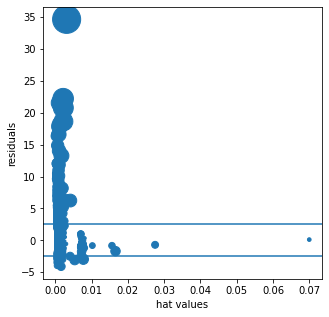

In [25]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal,s=1000*np.sqrt(influence.cooks_distance[0]))

ax.axhline(-2.5)
ax.axhline(2.5)

ax.set_xlabel("hat values")
ax.set_ylabel("residuals")